# RAINFAL PREDICTION MODEL & MLFLOM DEPLOYEMENT IN PYTHON

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [2]:
sns.set(style="whitegrid")
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('../Datasets/Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [4]:
df.shape

(366, 12)

## EDA Process

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


As we can observe the for the winddirection column there is a certain space comming out from there so lts remove it

In [7]:
df.columns = df.columns.str.strip()

**I am going to drop the column day as it is not useful for the analysis**.

In [8]:
df = df.drop(columns=['day'])
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


**Checking the number of unique entries per columns**

In [9]:
df.nunique()

pressure         188
maxtemp          174
temparature      158
mintemp          157
dewpoint         158
humidity          49
cloud             79
rainfall           2
sunshine         104
winddirection     31
windspeed        223
dtype: int64

**Checking fpr the missing values**

In [10]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

**As the are missing values for the columns winddrection and windspeed lets look at them more detailly first**

In [11]:
df['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [12]:
df['windspeed'].unique()

array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

**As we can observe with the .unique() the values of winddrection are real so we are going to replace the missing value with the mode of the distribution. In the case of the windspeed columns we are going to replace the missing values with the median of the distribution since the values of this columns are fractional(decimal)**

In [13]:
df['winddirection'] = df['winddirection'].fillna(df['winddirection'].mode()[0])
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].median())

In [14]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

**Handling categorical column**

In [15]:
df['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [16]:
df['rainfall'] = df['rainfall'].map({"yes":1, "no":0})

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       366 non-null    float64
 1   maxtemp        366 non-null    float64
 2   temparature    366 non-null    float64
 3   mintemp        366 non-null    float64
 4   dewpoint       366 non-null    float64
 5   humidity       366 non-null    int64  
 6   cloud          366 non-null    int64  
 7   rainfall       366 non-null    int64  
 8   sunshine       366 non-null    float64
 9   winddirection  366 non-null    float64
 10  windspeed      366 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 31.6 KB


## Some Visualisations

In [18]:
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

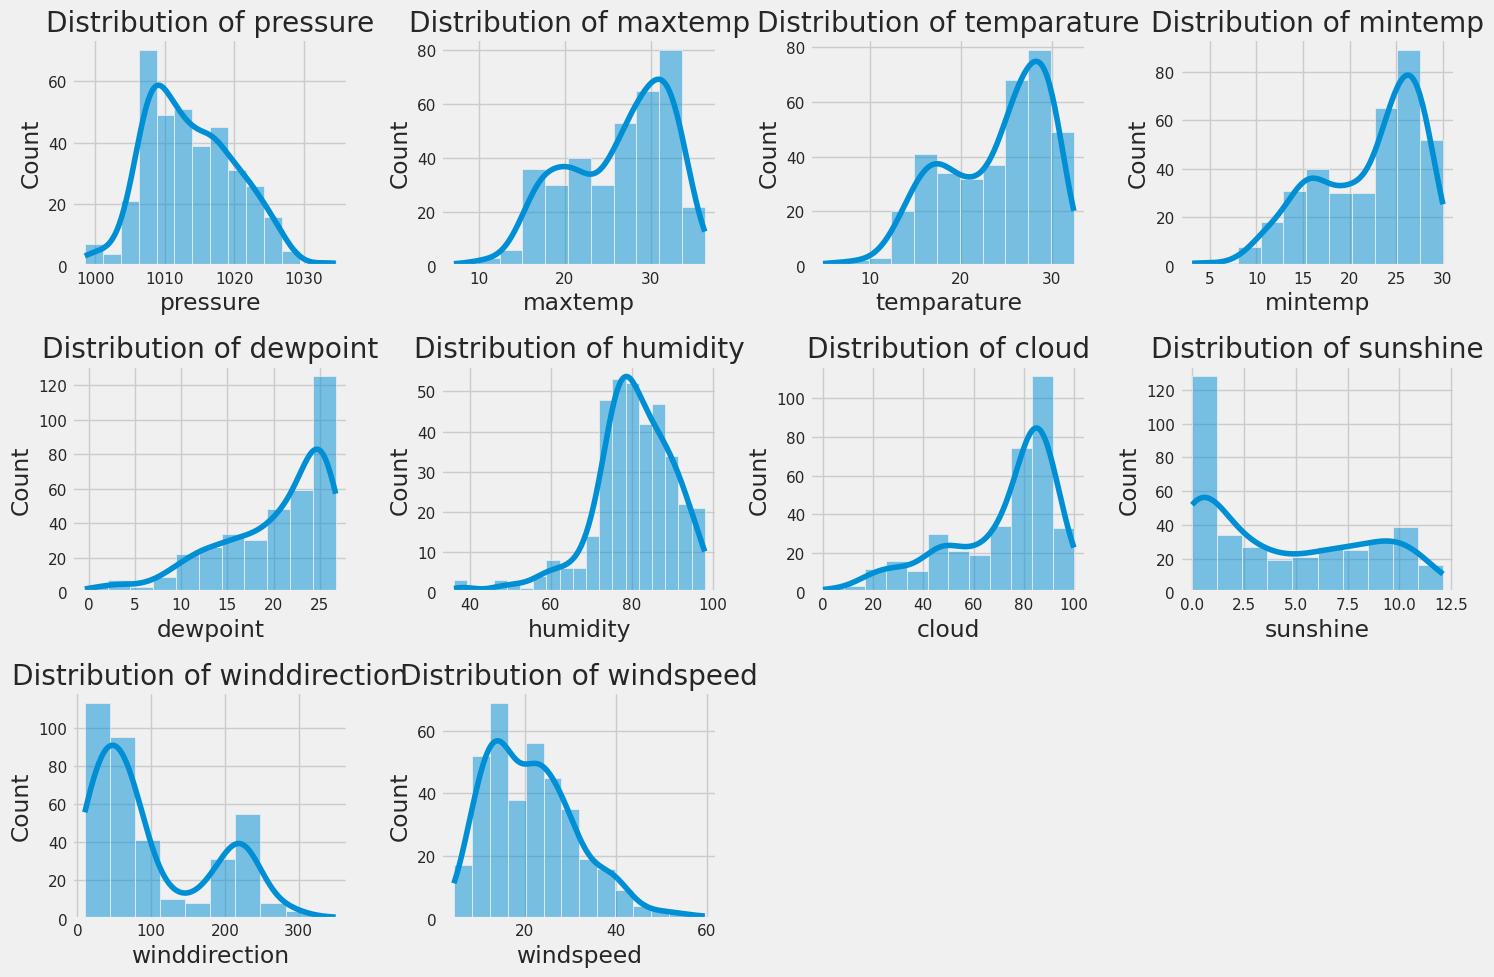

In [19]:
cols = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

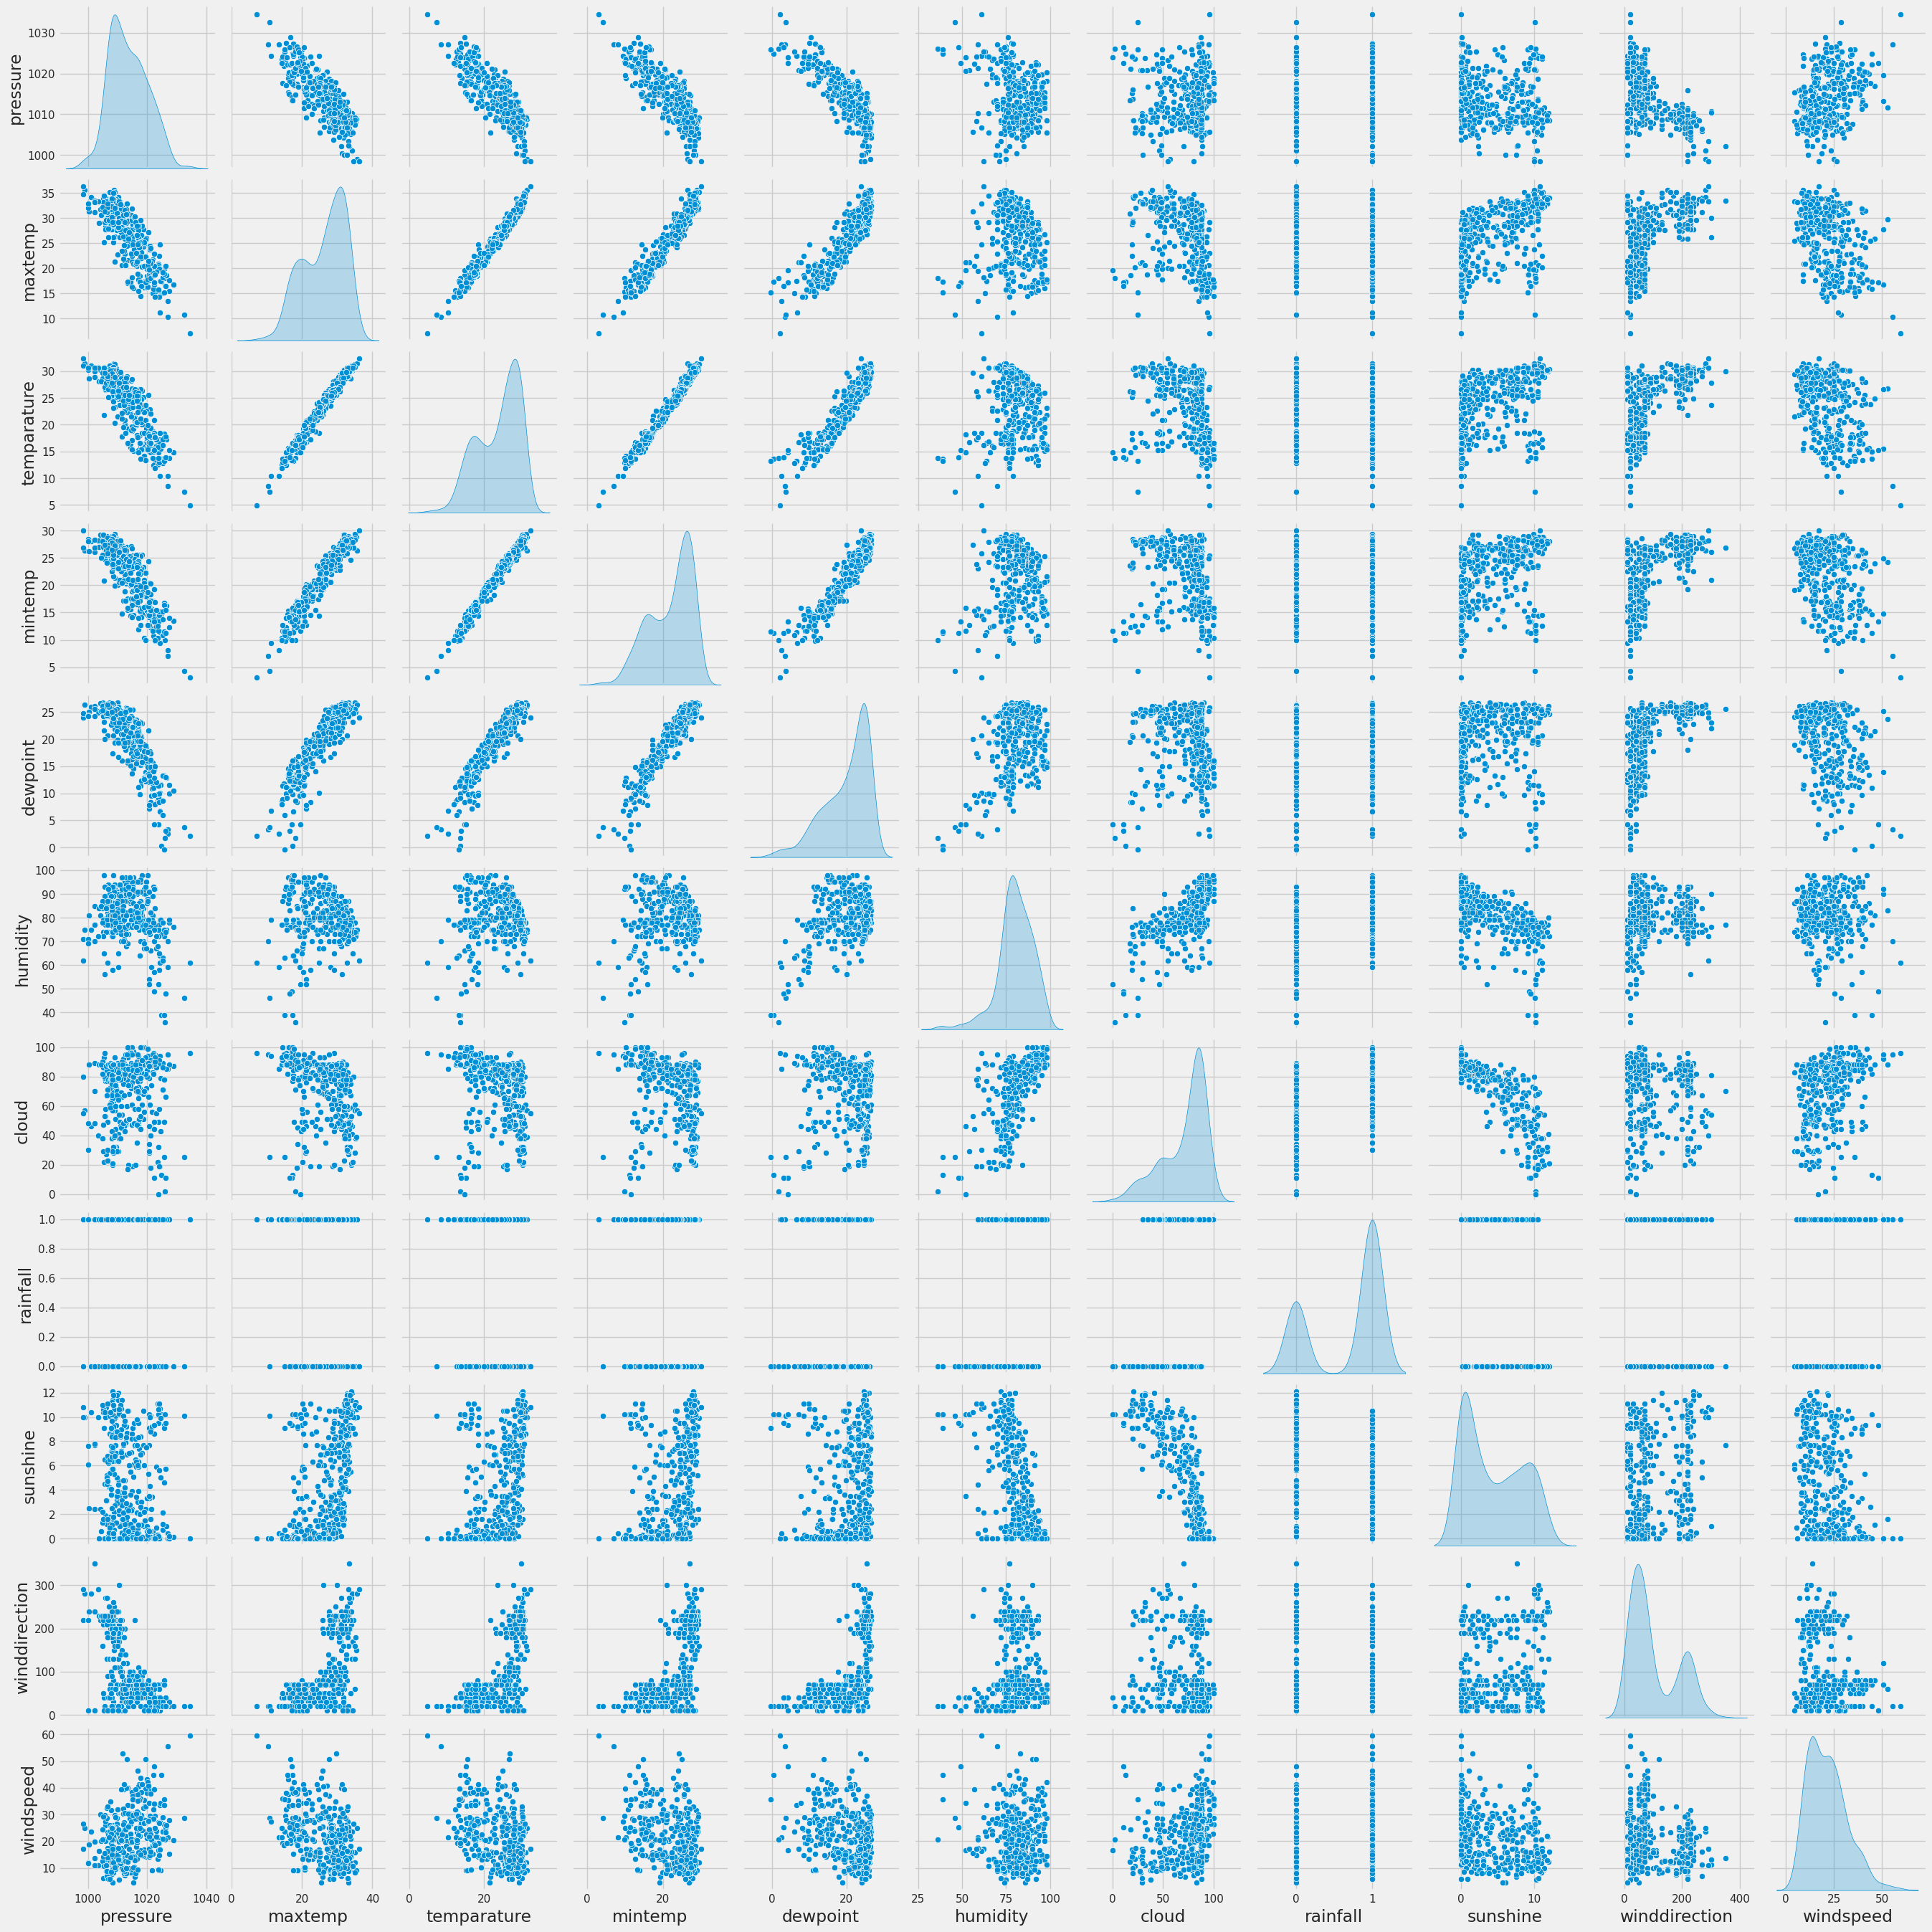

In [20]:
sns.pairplot(df, diag_kind='kde')

**Checking if the datasets is balanced**

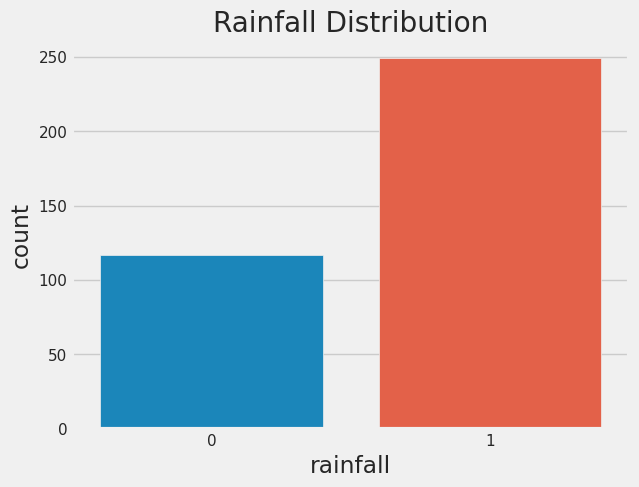

In [21]:
sns.countplot(x='rainfall', data=df )
plt.title('Rainfall Distribution')
plt.show()

**As we can observe that the dataset is inbalanced there are more yes(it going to rain) than no (it is no going to rain)**

## Feature Enginneering

Handling missing value-> mode , mean Categorical -> numerical , rainfall, map method kde - > histplot imbalance -> SMOTE (oversample, undersample) Feature eng.-> corr Outlier->boxplo

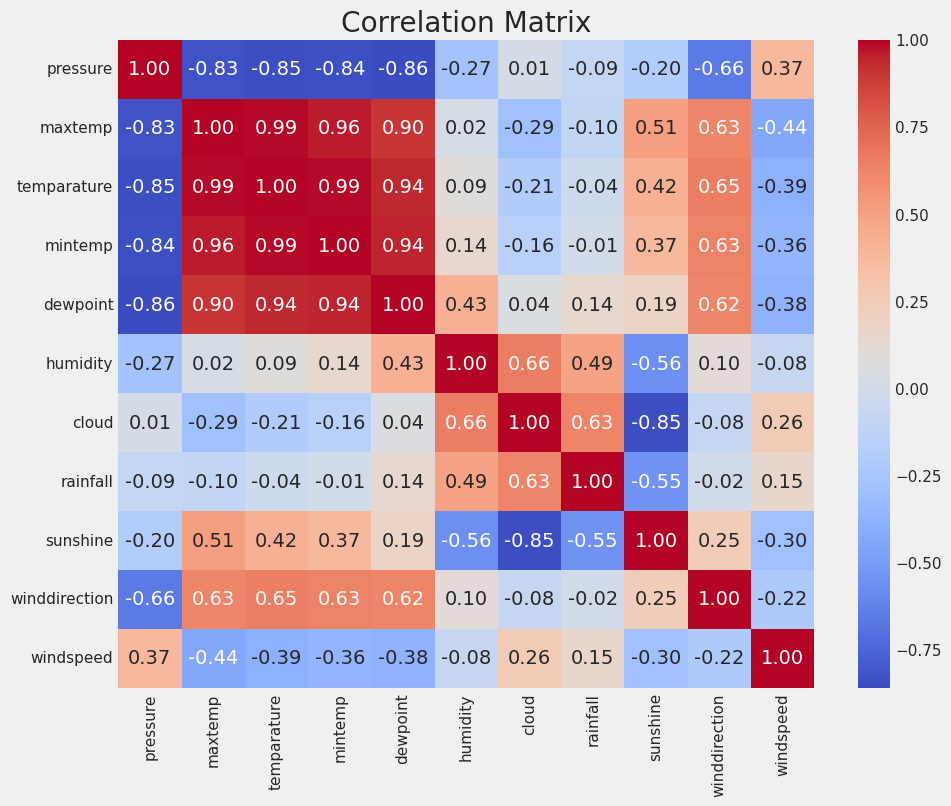

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Checking for Outliers**

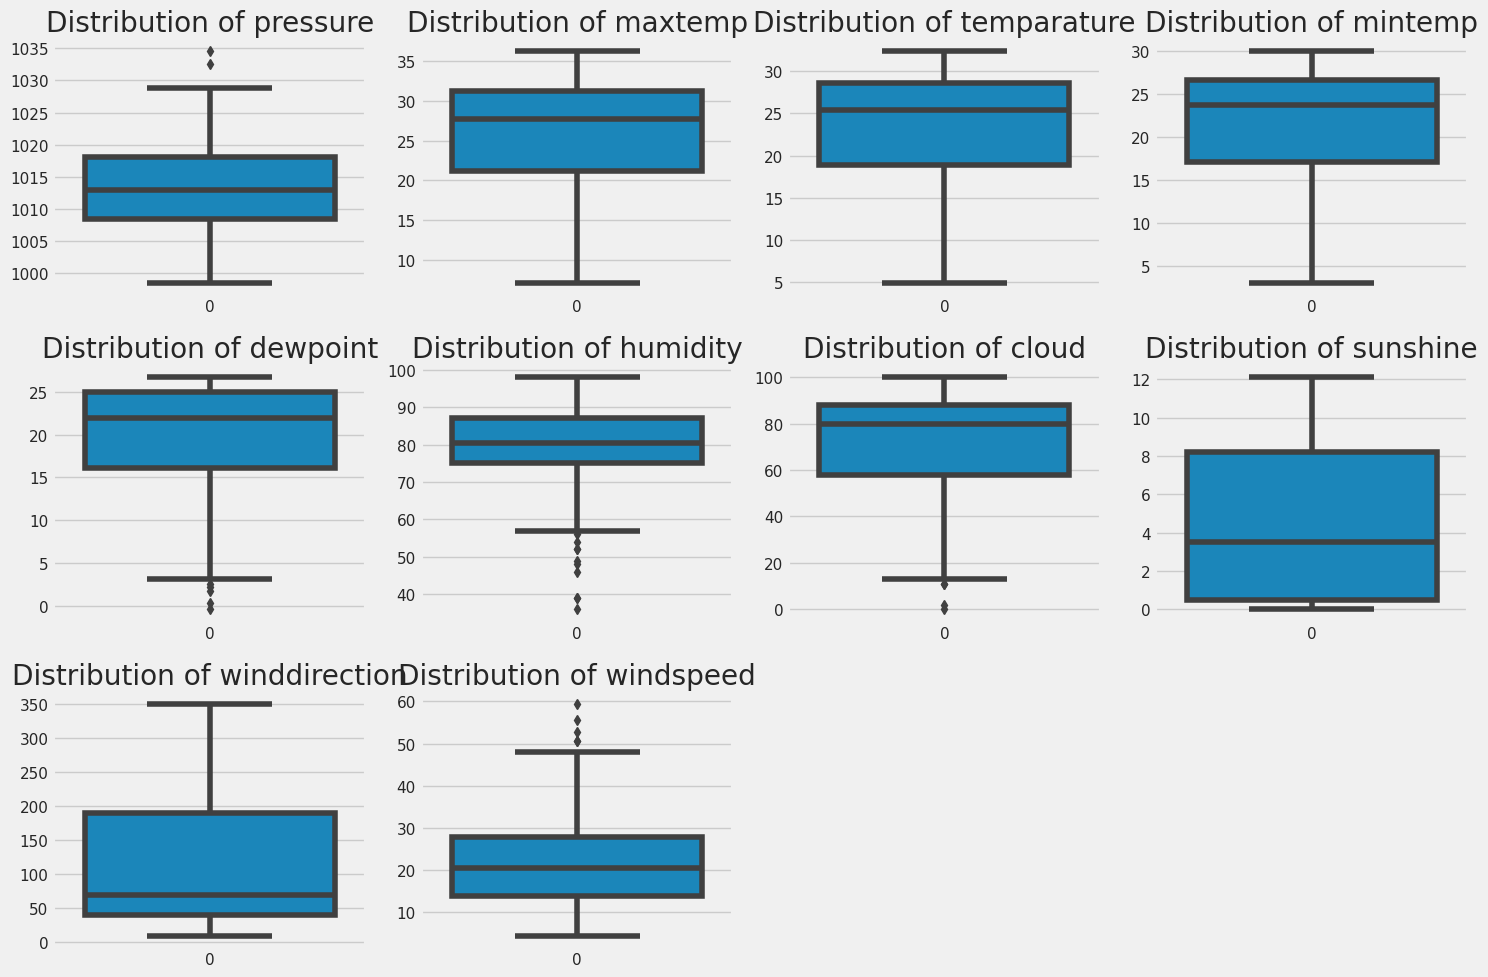

In [23]:
cols = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(df[col])
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

**We observe that there are some outliers for the columns dewpoint, humidity and cloud as shown in the figure above**

**Since the columns maxtemp, temparature, mintemp, dewpoint are strongly correlated as we can see in the correlation matrix above we are going to remove tha columns maxtemp, temparature, mintemp since strongly correlated variables can distort our analysis**

In [24]:
df = df.drop(columns=['maxtemp', 'temparature', 'mintemp'])
df.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [25]:
df['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

**Below we ara going to balanced the number of yes(1) and no(o) so that are dataset is being balanced in otherwod I am try to do a sort of data balancing of observations**

In [26]:
df_majority = df[df['rainfall'] == 1]
df_minority = df[df['rainfall'] == 0]

In [27]:
df_majority.shape, df_minority.shape

((249, 8), (117, 8))

In [28]:
upsample_indices = np.random.choice(df_minority.index, size = len(df_majority), replace=True)

In [29]:
upsample_indices.shape

(249,)

In [30]:
df_minority_upsampled = df_minority.loc[upsample_indices]

In [31]:
df_minority_upsampled.shape

(249, 8)

In [32]:
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [33]:
df_upsampled.shape

(498, 8)

In [34]:
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [35]:
df_upsampled.shape

(498, 8)

In [36]:
df_upsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1019.0,12.6,69,70,1,2.2,10.0,26.8
1,1006.7,24.7,77,23,0,11.1,230.0,17.3
2,1020.8,7.2,54,29,0,10.2,40.0,17.2
3,1012.0,19.9,76,79,0,4.8,70.0,30.3
4,1011.3,23.1,73,60,0,9.0,70.0,39.5


In [37]:
df_upsampled['rainfall'].value_counts()

rainfall
1    249
0    249
Name: count, dtype: int64

## Model Building

**Here I am going to use a random forest model in so that i can easly hyperperform parameter turning**

In [38]:
X = df_upsampled.drop(columns=['rainfall'])
y = df_upsampled['rainfall']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
rf_model = RandomForestClassifier(random_state=42)

param_grids_rf = {
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [41]:
grid_searchCV_rf = GridSearchCV(estimator=rf_model, param_grid=param_grids_rf, cv=5, n_jobs=-1, verbose=2)

In [42]:
grid_searchCV_rf.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 500]},
             verbose=2)

In [43]:
grid_searchCV_rf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [44]:
best_rf_model = grid_searchCV_rf.best_estimator_

In [45]:
cv_scores = cross_val_score(grid_searchCV_rf.best_estimator_, X_train, y_train, cv=5, n_jobs=-1)

In [46]:
cv_scores

array([0.85      , 0.9125    , 0.85      , 0.91139241, 0.89873418])

In [47]:
np.mean(cv_scores)

0.8845253164556961

In [48]:
y_pred = best_rf_model.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred)

0.92

In [50]:
confusion_matrix(y_test, y_pred)

array([[54,  3],
       [ 5, 38]])

In [51]:
report_dic = classification_report(y_test, y_pred, output_dict=True)

In [52]:
report_df = pd.DataFrame(report_dic).T

In [53]:
report_df

,precision,recall,f1-score,support
0,0.915254,0.947368,0.931034,57.00
1,0.926829,0.883721,0.904762,43.00
accuracy,0.920000,0.920000,0.920000,0.92
macro avg,0.921042,0.915545,0.917898,100.00
weighted avg,0.920232,0.920000,0.919737,100.00


**Now we are are going to use MLFlow which is a techque that is use full to mix up many different technqiues implementation of a model with different validation scores and compare them**

In [54]:
!pip install mlflow

Defaulting to user installation because normal site-packages is not writeable


In [55]:
import mlflow
import mlflow.sklearn

In [56]:
mlflow.set_tracking_uri('http://127.0.0.1:5000/')
mlflow.set_experiment('Rainfall_Prediction1')

with mlflow.start_run():
    # Log parameters and metrics
    mlflow.log_params(grid_searchCV_rf.best_params_)
    mlflow.log_metrics({
        "accuracy": report_dic['accuracy'],
        "recall_class_0": report_dic['0']['recall'],
        "recall_class_1": report_dic['1']['recall'],
        "f1_score_macro": report_dic['macro avg']['f1-score'],
    })

    # Log the model
    mlflow.sklearn.log_model(best_rf_model, 'Random Forest Model Data')

2024/12/27 10:39:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run smiling-crane-47 at: http://127.0.0.1:5000/#/experiments/142797939033098478/runs/08b42b23a8f0442f8804e186aa185f05
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/142797939033098478


In [57]:
model_name = "Random Forest Model Data"
run_id = "08b42b23a8f0442f8804e186aa185f05"
model_uri = f"runs:/{run_id}/{model_name}"

with mlflow.start_run(run_id=run_id):
    mlflow.register_model(model_uri=model_uri, name=model_name)

Successfully registered model 'Random Forest Model Data'.
2024/12/27 10:47:03 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest Model Data, version 1


🏃 View run smiling-crane-47 at: http://127.0.0.1:5000/#/experiments/142797939033098478/runs/08b42b23a8f0442f8804e186aa185f05
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/142797939033098478


Created version '1' of model 'Random Forest Model Data'.


In [58]:
logged_model = 'runs:/08b42b23a8f0442f8804e186aa185f05/Random Forest Model Data'

# Load model as a PyFuncModel.
loaded_model = mlflow.sklearn.load_model(logged_model)

# Predict on a Pandas DataFrame.
loaded_model.predict(X_test)

/home/redeus/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0])

In [60]:
loaded_model

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [65]:
current_model_uri = f"models:/{model_name}@challenger"
production_model_name = "rainfall_prediction-production"

client = mlflow.MlflowClient()
client.copy_model_version(src_model_uri=current_model_uri, dst_name=production_model_name)

Successfully registered model 'rainfall_prediction-production'.
Copied version '1' of model 'Random Forest Model Data' to version '1' of model 'rainfall_prediction-production'.


<ModelVersion: aliases=[], creation_timestamp=1735294576100, current_stage='None', description='', last_updated_timestamp=1735294576100, name='rainfall_prediction-production', run_id='08b42b23a8f0442f8804e186aa185f05', run_link='', source='models:/Random Forest Model Data/1', status='READY', status_message='', tags={}, user_id='', version='1'>

In [67]:
model_version = 1
prod_model_uri = f"models:/{production_model_name}@champion"

loaded_model = mlflow.sklearn.load_model(prod_model_uri)
y_pred = loaded_model.predict(X_test)

In [68]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0])

In [69]:
# Predictive System
input_df = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)
input_df = pd.DataFrame([input_df], ['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'])

In [70]:
prediction = loaded_model.predict(input_df)

/home/redeus/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [73]:
print("Prediction Results: ", "Its going to have Rainfaill" if prediction[0] == 1 else "No Rainfall") 

Prediction Results:  Its going to have Rainfaill


Realised by: [Rudy Tchamba](https://github.com/RudyTchamba/RepoDatascience-MachineLearning.git)